[ ] fit tempo di attivazione al variare della memoria.

[ ] parametri da fissare:n utenti, frazione di attivazione (30%??)

[x] acquisizione csv con i valori di attivazione e  memoria  (simulazioni a memoria fissa)

[ ] valore medio ed errore del tempo di attivazione per ogni memoria

[ ] fit con barre di errore 

In [1]:
library(data.table)
library(foreach)
library(doMC)

library(ggplot2)
library(plotrix)

library(ineq)

Loading required package: iterators
Loading required package: parallel


### List of files to analyze

In [2]:
files = c(
    "../../log/memoryLog2018_08_03_18_18_47.csv",
    "../../log/memoryLog2018_08_03_18_19_18.csv",
    "../../log/memoryLog2018_08_03_18_19_38.csv",
    "../../log/memoryLog2018_08_03_18_19_58.csv",
    "../../log/memoryLog2018_08_03_18_20_17.csv",

    "../../log/memoryLog2018_08_03_18_20_35.csv",
    "../../log/memoryLog2018_08_03_18_20_50.csv",
    "../../log/memoryLog2018_08_03_18_21_08.csv",
    "../../log/memoryLog2018_08_03_18_30_45.csv",
    "../../log/memoryLog2018_08_03_18_30_58.csv",

    "../../log/memoryLog2018_08_03_18_31_12.csv",
    "../../log/memoryLog2018_08_03_18_31_41.csv",
    "../../log/memoryLog2018_08_03_18_31_53.csv",
    "../../log/memoryLog2018_08_03_18_32_05.csv",
    "../../log/memoryLog2018_08_03_18_32_19.csv",

    "../../log/memoryLog2018_08_03_18_32_35.csv",
    "../../log/memoryLog2018_08_03_18_44_12.csv",
    "../../log/memoryLog2018_08_03_18_44_28.csv",
    "../../log/memoryLog2018_08_03_18_44_41.csv",
    "../../log/memoryLog2018_08_03_18_44_56.csv")
files[3]

[1] "../../log/memoryLog2018_08_03_18_19_38.csv"

### Heading

In [2]:
int <- read.csv(file="../../log/memoryLog2018_08_03_18_19_18.csv", nrows=11, sep=",", as.is=T)
maxtime    <- 1000
num_news   <- int$X..memorylog[6]
num_users  <- 1000
num_sources<- 20
memory  <- 20
#int

### Multicore detect

In [3]:
cores=detectCores()
#cluster <- makeCluster(cores[1] - 1)
registerDoMC(cores -1)

### Analysis

In [8]:
HBp <- matrix(nrow=memory*num_sources, ncol=maxtime)
for(k in 1:memory){
    DTp <- fread(files[k])
    print(files[k])
    newsvec <- DTp[1:num_news,'news0']
    newsvec <- as.vector(t(newsvec))
    nn <-vector(mode="integer",length=num_news)
    TBp <- foreach (i=1:maxtime, .combine=rbind) %dopar% {
        for(j in 1:num_news){
            nn[j] =sum(apply(subset(DTp, time == i),1,function(x) length(which(x==newsvec[j]))))
     
       }
       c(nn)
    }
    for(m in 1:num_sources){
        #print(num_sources * ( k - 1 ) + m)
        HBp[num_sources * ( k - 1 ) + m,] = as.vector(TBp[,m])
    }
    #gc()
}

[1] "../../log/memoryLog2018_08_03_18_18_47.csv"
[1] "../../log/memoryLog2018_08_03_18_19_18.csv"
[1] "../../log/memoryLog2018_08_03_18_19_38.csv"
[1] "../../log/memoryLog2018_08_03_18_19_58.csv"
[1] "../../log/memoryLog2018_08_03_18_20_17.csv"
[1] "../../log/memoryLog2018_08_03_18_20_35.csv"
[1] "../../log/memoryLog2018_08_03_18_20_50.csv"
[1] "../../log/memoryLog2018_08_03_18_21_08.csv"
[1] "../../log/memoryLog2018_08_03_18_30_45.csv"
[1] "../../log/memoryLog2018_08_03_18_30_58.csv"


Warning message in fread(files[k]):
“Bumped column 13 to type character on data row 662243, field contains 'eda728be8f192031'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.”

[1] "../../log/memoryLog2018_08_03_18_31_12.csv"
[1] "../../log/memoryLog2018_08_03_18_31_41.csv"
[1] "../../log/memoryLog2018_08_03_18_31_53.csv"


Warning message in fread(files[k]):
“Bumped column 12 to type character on data row 15842, field contains 'adf947c84edff299'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.”

[1] "../../log/memoryLog2018_08_03_18_32_05.csv"
[1] "../../log/memoryLog2018_08_03_18_32_19.csv"


Warning message in fread(files[k]):
“Bumped column 13 to type character on data row 343257, field contains '9df352d02b688280'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.”

[1] "../../log/memoryLog2018_08_03_18_32_35.csv"


Warning message in fread(files[k]):
“Bumped column 14 to type character on data row 608348, field contains '53d2356ee72493be'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.”

[1] "../../log/memoryLog2018_08_03_18_44_12.csv"
[1] "../../log/memoryLog2018_08_03_18_44_28.csv"


Warning message in fread(files[k]):
“Bumped column 12 to type character on data row 587706, field contains '073313aa2ffe6105'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.”

[1] "../../log/memoryLog2018_08_03_18_44_41.csv"
[1] "../../log/memoryLog2018_08_03_18_44_56.csv"


### to not recompute all the analysis :

In [36]:
fwrite(x = data.table(HBp), file="./HBp.csv")

In [4]:
HBp <- fread(file = './HBp.csv', header=TRUE, sep=",")

In [5]:
#HBp <- matrix(HBp)
as.numeric(HBp[1,])

[1]  1  3  5 19 40 56 58 42 41 41 36 21 16 10  9  6  7  5  4  5  5  6  8  6
  [25]  5  2  4  2  4  7  4  2  2  2  1  2  1  1  2  3  2  4  6  5  3  4  4  3
  [49]  7  7  5  6  4  3  3  2  1  3  3  2  1  1  3  3  1  2  1  1  1  1  1  1
  [73]  1  2  2  1  3  1  1  1  1  1  3  3  3  1  3  1  1  1  3  4  4  2  1  1
  [97]  1  3  3  4  3  1  1  1  1  3  3  1  1  1  1  3  3  3  3  2  2  2  2  1
 [121]  3  3  3  2  2  1  3  2  2  2  2  1  1  3  2  2  1  1  1  2  3  2  2  2
 [145]  1  2  2  2  2  2  2  1  3  1  1  1  1  1  1  3  3  4  3  2  1  1  1  2
 [169]  3  4  3  2  2  3  5  7  4  3  2  2  3  5  4  4  3  4  2  3  4  2  2  2
 [193]  2  4  3  2  1  1  1  3  3  3  3  3  2  1  3  3  3  3  3  2  3  1  1  3
 [217]  2  2  2  1  1  1  1  1  1  1  1  2  3  1  1  1  1  1  1  1  1  1  1  1
 [241]  2  3  3  2  1  1  1  2  2  1  1  1  1  1  3  3  3  1  1  1  1  3  3  1
 [265]  1  1  1  1  3  3  1  1  1  1  1  2  3  1  1  1  1  2  2  1  1  1  1  3
 [289]  3  1  1  1  1  3  3  4  2  2  1  1  4  2  2  2  2  2  4  3  2  2  2  2
 [313]  2  4  4  2  3  3  3  2  2  2  3  2  3  3  3  4  2  2  4  4  5  7  4  4
 [337]  4  7  7  8  5  5  4  4  4  4  4  3  2  3  2  3  2  2  2  2  2  2  3  3
 [361]  3  4  2  2  2  2  3  3  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1
 [385]  1  1  1  1  1  1  1  1  1  1  2  4  4  4  2  2  2  2  1  1  1  3  4  2
 [409]  2  2  2  3  2  3  5  3  3  3  3  3  4  5  3  3  3  3  3  2  3  3  3  3
 [433]  4  3  3  3  3  3  3  1  1  1  2  3  3  3  2  3  3  3  3  3  1  1  3  3
 [457]  3  2  1  1  1  1  3  3  3  3  1  1  1  3  3  3  3  1  1  1  1  1  1  1
 [481]  1  1  1  1  1  1  1  1  1  1  1  1  3  2  3  3  2  3  1  1  1  3  3  3
 [505]  1  1  1  1  3  3  4  4  3  3  2  3  4  3  3  2  1  1  1  1  1  1  1  3
 [529]  2  2  2  2  1  1  1  1  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1
 [553]  3  3  3  1  1  1  1  1  1  3  2  2  1  1  1  1  3  3  1  1  1  1  1  1
 [577]  3  4  3  2  2  2  2  3  3  3  5  2  2  2  3  4  4  4  4  4  4  2  1  1
 [601]  2  3  3  4  2  2  2  3  2  2  2  2  4  4  3  3  3  3  4  5  2  1  2  2
 [625]  2  2  2  2  1  1  1  1  1  3  3  1  1  1  1  1  3  3  2  1  1  1  1  2
 [649]  3  1  1  1  1  1  1  2  3  1  2  1  1  1  1  3  2  1  1  1  1  1  1  1
 [673]  1  1  1  1  1  1  1  1  1  1  1  3  2  1  1  1  1  3  1  1  1  1  1  1
 [697]  3  3  1  1  1  1  1  1  4  3  3  4  3  4  4  3  3  3  2  2  1  3  2  1
 [721]  1  1  1  1  1  1  1  1  1  1  3  2  1  1  1  1  3  1  1  1  1  1  1  3
 [745]  4  5  5  2  2  1  3  2  4  4  3  4  3  2  2  3  3  5  7  4  6  6  5  5
 [769]  5  5  6  4  5  5  5  6  7  6  6  5  5  7  7  7  5  6  5  6  6  6  7  5
 [793]  3  3  3  4  4  5  7  3  3  3  4  6  5  5  4  4  4  4  6  4  5  5  4  5
 [817]  6  4  4  4  2  2  1  1  1  3  2  4  2  2  3  1  1  1  2  3  3  2  2  3
 [841]  3  5  5  5  5  4  3  3  4  6  5  5  5  3  4  4  4  4  4  3  3  4  3  5
 [865]  4  4  5  5  5  6  4  5  5  5  5  4  4  4  4  4  4  5  3  3  3  3  3  4
 [889]  4  4  4  4  4  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  5  4  3  4
 [913]  3  3  3  3  3  4  4  3  3  3  3  3  3  4  4  4  4  3  3  3  3  4  4  4
 [937]  3  3  3  3  3  4  2  3  3  3  3  4  5  4  4  4  3  3  4  3  3  3  3  3
 [961]  4  4  3  3  3  3  3  3  5  4  4  3  3  3  3  4  3  3  3  3  3  4  3  3
 [985]  3  3  5  4  4  5  4  3  3  2  3  5  5  4  4  4

### Histograms

Warning message:
“Ignoring unknown parameters: start”Warning message in (function (formula, data = parent.frame(), start, control = nls.control(), :
“No starting values specified for some parameters.
Initializing ‘a’, ‘b’ to '1.'.
Consider specifying 'start' or using a selfStart model”

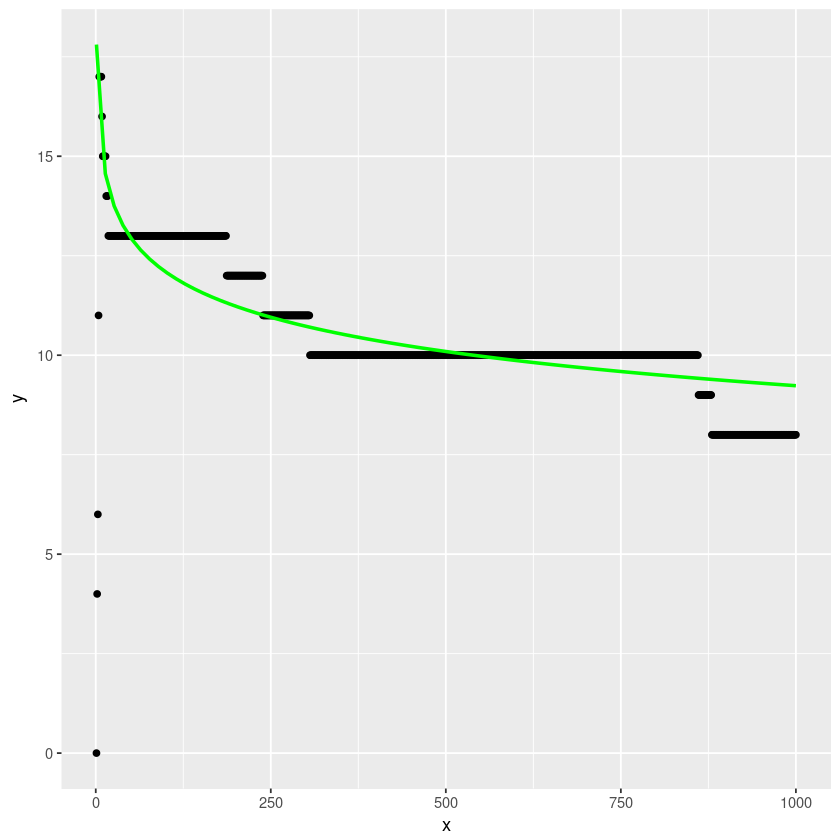

In [6]:
 # a smattering of possible models... just made up on the spot
    # with more effort some better candidates should be added
# a smattering of possible models...
#-----------------------------------------------------------------------------------------#
#                                                                                         #
#      https://stackoverflow.com/questions/14190883/fitting-a-curve-to-specific-data      #
#                                                                                         #
#-----------------------------------------------------------------------------------------#
n = 92
x<-1:maxtime
y<-as.numeric(HBp[n,]-1)
dat<-data.frame(x,y)
models <- list(lm(y~x, data = dat), 
               lm(y~I(1/x), data=dat),
               lm(y ~ log(x), data = dat),
               nls(y ~ I(1/x*a) + b*x, data = dat, start = list(a = 1, b = 1)), 
               nls(y ~ (a + b*log(x)), data=dat, start = setNames(coef(lm(y ~ log(x), data=dat)), c("a", "b"))),
               nls(y ~ I(exp(1)^(a + b * x)), data=dat, start = list(a=0,b=0)),
               nls(y ~ I(1/x*a)+b, data=dat, start = list(a=1,b=1))
)

  ggplot(dat, aes(x, y)) + geom_point() +
  #stat_smooth(method = "lm", formula = as.formula(models[[1]]), size = 1, se = FALSE, colour = "black") + 
  #stat_smooth(method = "lm", formula = as.formula(models[[2]]), size = 1, se = FALSE, colour = "blue") + 
  #stat_smooth(method = "lm", formula = as.formula(models[[3]]), size = 1, se = FALSE, colour = "yellow") + 
  #stat_smooth(method = "nls", formula = as.formula(models[[4]]), data=dat, start = list(a=0,b=0), size = 1, se = FALSE, colour = "red") + 
  stat_smooth(method = "nls", formula = as.formula(models[[5]]), data=dat, start = setNames(coef(lm(y ~ log(x), data=dat)), c("a", "b")), size = 1, se = FALSE, colour = "green")# +
  #stat_smooth(method = "nls", formula = as.formula(models[[6]]), data=dat, start = list(a=0,b=0), size = 1, se = FALSE, colour = "violet") +
  #stat_smooth(method = "nls", formula = as.formula(models[[7]]), data=dat, start = list(a=0,b=0), size = 1, se = FALSE, colour = "orange")

In [9]:
bb <- 200
norm <- num_users/bb
num_sources*memory
threshold <- 1000

mean_news <- double()
gini_news <- double()

for(i in 1:memory ){
    for(j in 1:num_sources){
        #foo <- data.frame(1:maxtime, as.vector(HBp[(i - 1)*num_sources + j,] - 1)/(num_users*norm))
        #p <- ggplot(foo, aes(1:maxtime, weight = as.vector(HBp[(i - 1)*num_sources + j,] - 1)/(num_users*norm))) + geom_histogram()
        #plot( p, col=rgb(0,0,1,1/4))#, xlim=c(0,10))  # first histogram
        
        #####  plot histogram #####
        #weighted.hist(
        #    1:maxtime ,as.vector(HBp[(i - 1)*num_sources + j,] - 1)/(num_users*norm), 
        #    col=rgb(0.05*i,0,1 - 0.05*(i-1),0.7),
        #    main=paste("Memory", as.character(i), "news", as.character(j)), 
        #    xlab="Time", ylab=paste("news", as.character(j)), breaks=bb)
        ###########################

        #box()

        temp_vector <- as.vector(HBp[(i - 1)*num_sources + j,] - 1, mode="numeric")/(num_users*norm)
        temp_2vector <- 0.
        for(k in (maxtime - threshold + 1):maxtime){
            temp_2vector <- temp_2vector + temp_vector[k]
        }
        temp_2vector <- temp_2vector / threshold
        mean_news[(i - 1)*num_sources + j] <- temp_2vector # mean vector of news
    }
    gini_news[i] <- Gini(mean_news[ ((i - 1) * num_sources + 1):( i * num_sources ) ])
}

[1] 400

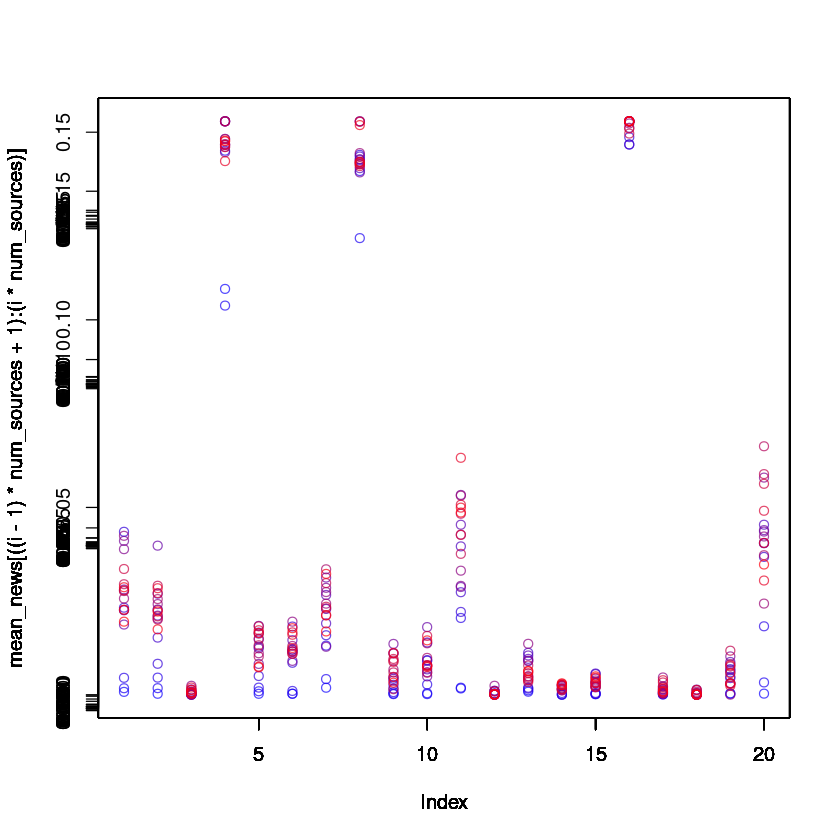

In [34]:
for(i in 1:memory){
    plot(mean_news[ ((i - 1) * num_sources + 1):( i * num_sources ) ], col=rgb(0.05*i,0,1 - 0.05*(i-1),0.7))
    par(new=TRUE)
}

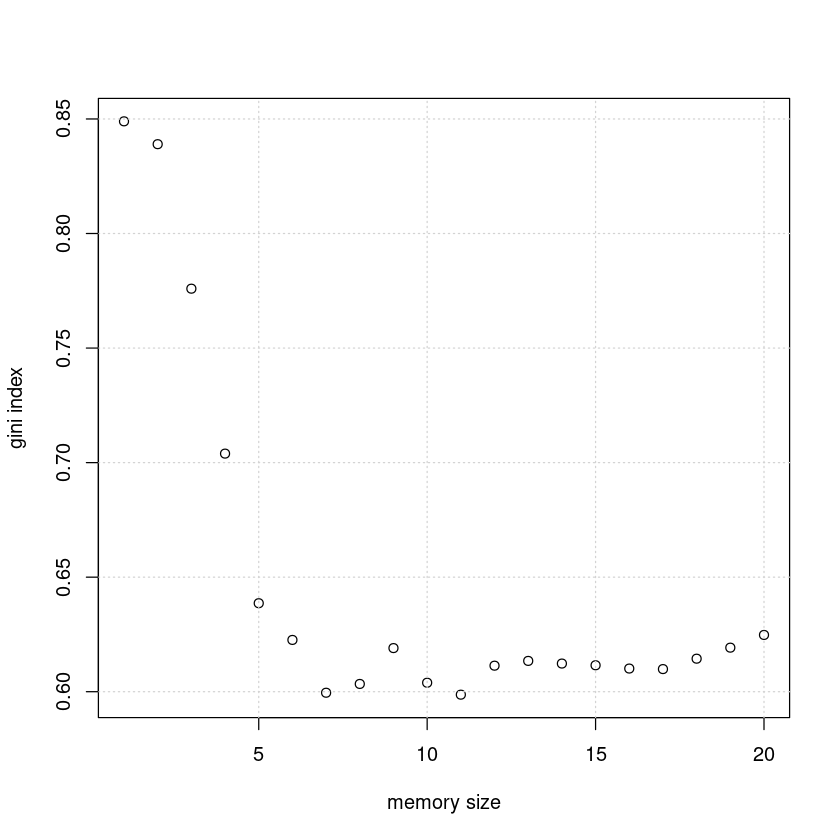

In [133]:
Data <- data.frame(c(1:20), gini_news)
colnames(Data) <- c("memory","gini")
plot(Data$gini, xlab="memory size", ylab="gini index")
grid()

Nonlinear regression model
  model: gini ~ nonlin(memory, c, d)
   data: Data
         c          d 
 0.0110579 -0.0005047 
 residual sum-of-squares: 2.705

Number of iterations to convergence: 1 
Achieved convergence tolerance: 3.315e-06



Formula: gini ~ nonlin(memory, c, d)

Parameters:
    Estimate Std. Error t value Pr(>|t|)    
c  0.0110579  0.0027456   4.028  0.00079 ***
d -0.0005047  0.0001586  -3.182  0.00517 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3876 on 18 degrees of freedom

Number of iterations to convergence: 1 
Achieved convergence tolerance: 3.315e-06


            c             d 
 0.0110579456 -0.0005047415 


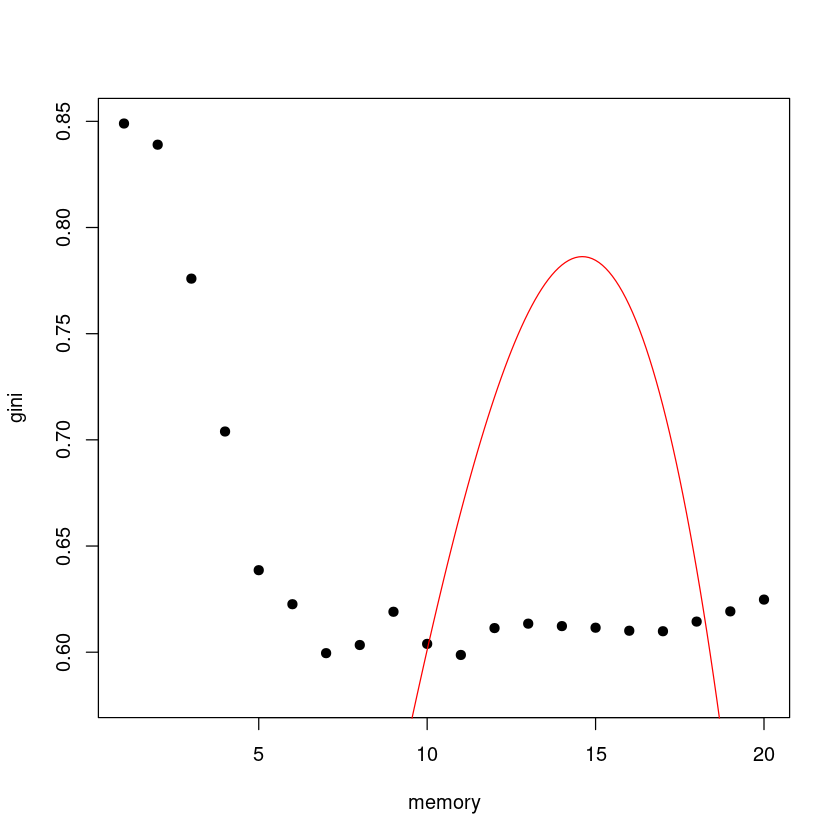

In [148]:
#plot(data$memory, data$gini)
nonlin <- function(x,c,d) { c*x^2 + d*x^3}
nlsfit <- nls(gini ~ nonlin(memory, c, d), data=Data, start=list(c=-1,d=0.1))
print(nlsfit)
summary(nlsfit)

with(data, plot(memory, gini, pch=19, ylim=c(0.58,0.85)))
tseq <- seq(0,250,.1)
pars <- coef(nlsfit)
print(pars)
lines(tseq, nonlin(tseq, pars[1], pars[2]), col=2)

In [95]:
test <- data.frame(memory=c(0,5,10,15,30,50,60,90,120,180,240), gini=c(0.48, 1.15, 1.03, 1.37, 5.55, 16.77, 20.97, 21.67, 10.50, 2.28, 1.58))

nonlin <- function(x, a, b) { exp(a+b*x^2) }
nlsfit <- nls(gini ~ nonlin(memory, a, b), data=test, start=list(a=25, b=20))

#with(test, plot(times, RNA, pch=19, ylim=c(0,40)))
#tseq <- seq(0,250,.1)
#pars <- coef(nlsfit)
#print(pars)
#lines(tseq, nonlin(tseq, pars[1], pars[2], pars[3]), col=2)

ERROR: Error in numericDeriv(form[[3L]], names(ind), env): Missing value or an infinity produced when evaluating the model
